# Pymaceuticals Inc.
---

### Summary of Study Results

- Pymaceuticals conducted a study to test the effectiveness of different drug treatments for squamous cell carcinoma (SCC) in mice. The study followed 249 mice over 45 days, tracking changes in their tumor sizes. The goal was to see how well Pymaceuticals' drug, Capomulin, worked compared to other treatments.

- Here's what we found:

1. Capomulin's Effectiveness:
- Mice treated with Capomulin generally had smaller tumor sizes over time, which means it helps control the growth of the tumors better than some of the other drugs.

- Capomulin also showed a strong relationship between lower tumor size and stable weight, meaning it may help mice stay healthier overall.

2. Tumor size comparisons:
- When comparing all treatments, Capomulin and Ramicane had the lowest average tumor sizesm meaning they are the most effective drugs.

- Infubinol had one outlier meaning that it might not work as consistently across different mice.

3. Data consistency:
-Looking at the stats like mean, variance and standard error for each drug regimen measures how consistent the results were. Capomulin adn Ramicane had smaller variances, showing that their results were more reliable.

4. Gender Balance:
- There was an equal amount of male to female mice , so the results can not be skewed by gender.

5. Visual Findings:
- Using visual aids like box plots and scatter plots helped confirm the effectiveness of teh drugs especially Capomulin being the most effective.

### Conclusion 

Capomulin and Ramicane preformed best in reducing tumor sizes in mice with SCC.  These results suggest that Capomulin could be a promising treatment for this type of cancer once it has been further tested. Capomulin showed consistent results, meaning it would be the best option to do some further testing and a deeper dive into research.
 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data= pd.merge(mouse_metadata, study_results, on="Mouse ID")


# Display the data table for preview
combined_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
# Checking the number of mice.
number_of_mice = combined_data["Mouse ID"].nunique()

number_of_mice

249

In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_mice = combined_data[combined_data.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)]
duplicate_mice_ids = duplicate_mice["Mouse ID"].unique()
duplicate_mice_ids

array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID.
duplicate_mice_data = combined_data[combined_data["Mouse ID"].isin(duplicate_mice_ids)]
duplicate_mice_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [122]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_data = combined_data.drop_duplicates(subset=["Mouse ID", "Timepoint"])
cleaned_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [123]:
# Checking the number of mice in the clean DataFrame.
number_of_mice = cleaned_data["Mouse ID"].nunique()
print(f"Number of unique mice: {number_of_mice}")

Number of unique mice: 249


## Summary Statistics

In [124]:
# Calculate the mean of the tumor volume for each regimen
mean_tumor_volume = cleaned_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()

# Calculate the median of the tumor volume for each regimen
median_tumor_volume = cleaned_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()

# Calculate the variance of the tumor volume for each regimen
variance_tumor_volume = cleaned_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()

# Calculate the standard deviation of the tumor volume for each regimen
std_tumor_volume = cleaned_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()

# Calculate the standard error of the mean (SEM) of the tumor volume for each regimen
sem_tumor_volume = cleaned_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

# Combine all these statistics into a single DataFrame
summary_statistics = pd.DataFrame({
    "Mean Tumor Volume": mean_tumor_volume,
    "Median Tumor Volume": median_tumor_volume,
    "Tumor Volume Variance": variance_tumor_volume,
    "Tumor Volume Std. Dev.": std_tumor_volume,
    "Tumor Volume Std. Err.": sem_tumor_volume
})

# Display the summary statistics DataFrame
summary_statistics

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [125]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_statistics = cleaned_data.groupby('Drug Regimen').agg(
    Mean=('Tumor Volume (mm3)', 'mean'),
    Median=('Tumor Volume (mm3)', 'median'),
    Variance=('Tumor Volume (mm3)', 'var'),
    Std_Dev=('Tumor Volume (mm3)', 'std'),
    SEM=('Tumor Volume (mm3)', 'sem')
)

# Display the summary statistics DataFrame
summary_statistics

,Mean,Median,Variance,Std_Dev,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

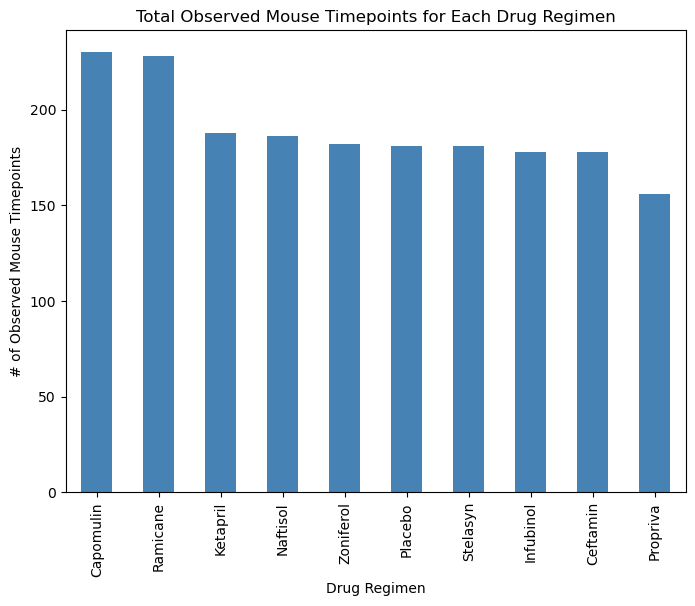

In [126]:
# Aggregating data for the bar chart
mouse_counts = cleaned_data['Drug Regimen'].value_counts()

# Plotting the bar chart using Pandas
mouse_counts.plot(kind='bar', figsize=(8, 6), color="steelblue")

# Adding title and labels
plt.title("Total Observed Mouse Timepoints for Each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")

plt.show()

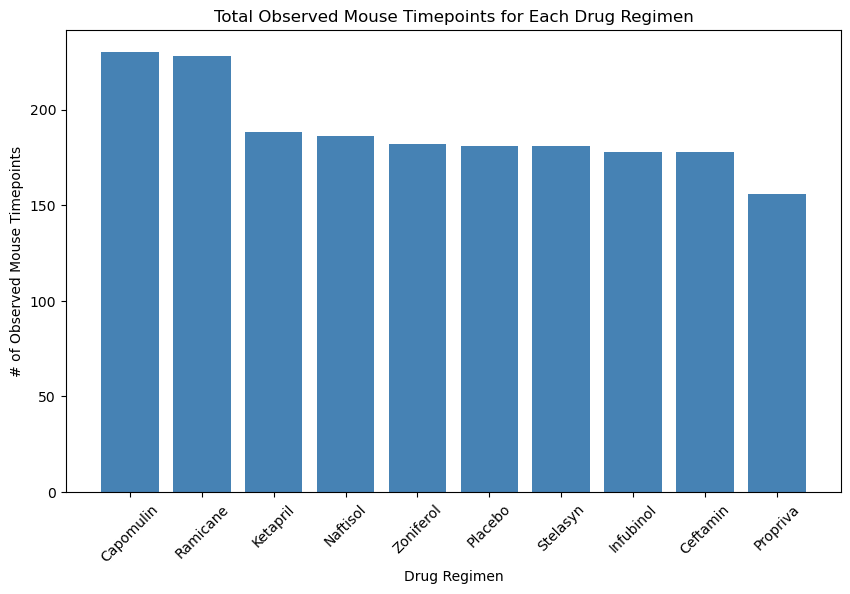

In [127]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
regimen_counts = cleaned_data['Drug Regimen'].value_counts()

# Generate a bar plot using pyplot
plt.figure(figsize=(10, 6))
plt.bar(regimen_counts.index, regimen_counts.values, color="steelblue")

# Add titles and labels
plt.title("Total Observed Mouse Timepoints for Each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation=45)

# Show the plot
plt.show()

In [128]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study
unique_mice = cleaned_data[['Mouse ID', 'Sex']].drop_duplicates()

unique_mice

,Mouse ID,Sex
0,k403,Male
10,s185,Female
20,x401,Female
30,m601,Male
40,g791,Male
...,...,...
1858,z314,Female
1860,z435,Female
1863,z581,Female
1873,z795,Female


In [129]:
# Get the unique mice with their gender
gender_counts = unique_mice['Sex'].value_counts()

gender_counts

Sex
Male      125
Female    124
Name: count, dtype: int64

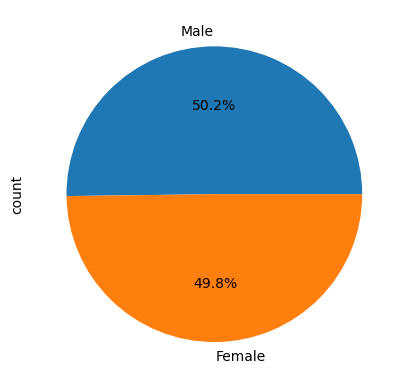

In [130]:
# Make the pie chart
gender_counts.plot(kind='pie', autopct='%1.1f%%', startangle=0, color=['steelblue','orange'])

plt.ylabel('count') 

#Show the plot
plt.show()

#Show the plot
plt.show()

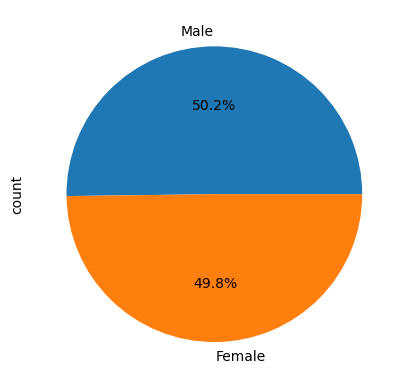

In [131]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study
unique_mice = cleaned_data[['Mouse ID', 'Sex']].drop_duplicates()

# Get the unique mice with their gender
gender_counts = unique_mice['Sex'].value_counts()

# Make the pie chart
gender_counts.plot(kind='pie', autopct='%1.1f%%', startangle=0, color=['steelblue','orange'])

#Show the plot
plt.show()


## Quartiles, Outliers and Boxplots

In [132]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin
treatment_data = cleaned_data[cleaned_data['Drug Regimen'].isin(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])]

# Start by getting the last (greatest) timepoint for each mouse
max_timepoints = treatment_data.groupby('Mouse ID')['Timepoint'].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volume = pd.merge(max_timepoints, cleaned_data, on=['Mouse ID', 'Timepoint'], how='left')

# Display the result
final_tumor_volume.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a275,45,Ceftamin,Female,20,28,62.999356,3
3,a411,45,Ramicane,Male,3,22,38.407618,1
4,a444,45,Ramicane,Female,10,25,43.047543,0


In [133]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]


# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []


# Calculate the IQR and quantitatively determine if there are any potential outliers.
for drug in treatments:

    # Locate the rows which contain mice on each drug and get the tumor volumes
    drug_data = final_tumor_volume[final_tumor_volume["Drug Regimen"] == drug]["Tumor Volume (mm3)"]

    # add subset
    tumor_vol_data.append(drug_data)

    #Calculate the IQR and quantitatively determine if there are any potential outliers
    quartiles = drug_data.quantile([0.25,0.5,0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq

    
    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - 1.5 * iqr
    upper_bound = upperq + 1.5 * iqr

    #Identify and print any outliers
    outliers = drug_data[(drug_data < lower_bound)| (drug_data > upper_bound)]
    print(f"{drug}'s potential outliers: {outliers}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 15    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


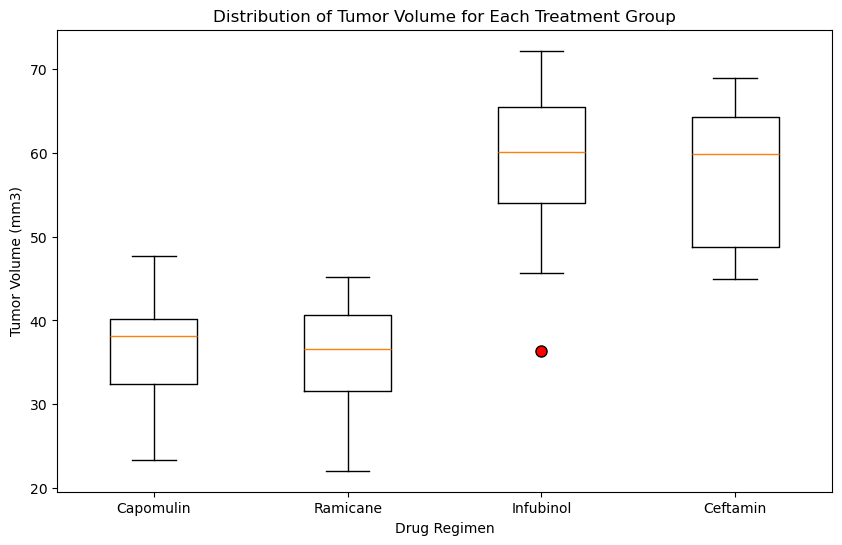

In [134]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
treatments =['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

#Create a list of tumor volume data for each treatment group
tumor_data = [final_tumor_volume[final_tumor_volume['Drug Regimen'] == treatments]['Tumor Volume (mm3)'] for treatments in treatments]

#Create the box plot 
plt.figure(figsize=(10, 6))
plt.boxplot(tumor_data, tick_labels=treatments, flierprops={'marker': 'o', 'markerfacecolor': 'red', 'markersize': 8})
plt.xlabel("Drug Regimen")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Distribution of Tumor Volume for Each Treatment Group")

# Show the plot
plt.show()

## Line and Scatter Plots

In [169]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

# Filter the data for a single mouse treated with Capomulin
single_mouse_data = capomulin_data[capomulin_data["Mouse ID"] == 'l509']

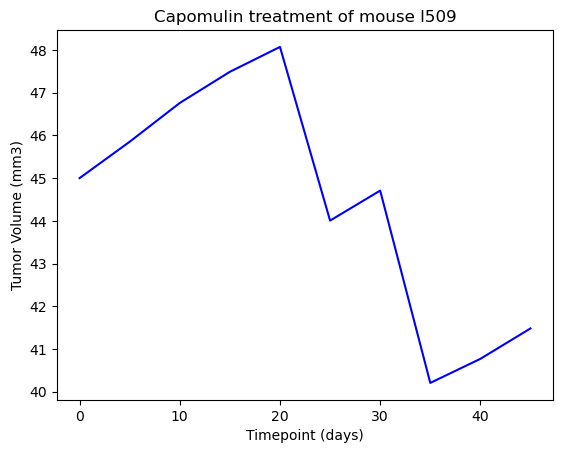

In [170]:

# Plot the tumor volume over time for the selected mouse
plt.plot(single_mouse_data["Timepoint"], single_mouse_data["Tumor Volume (mm3)"], color='b')
plt.title(f"Capomulin treatment of mouse l509")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")

plt.show()



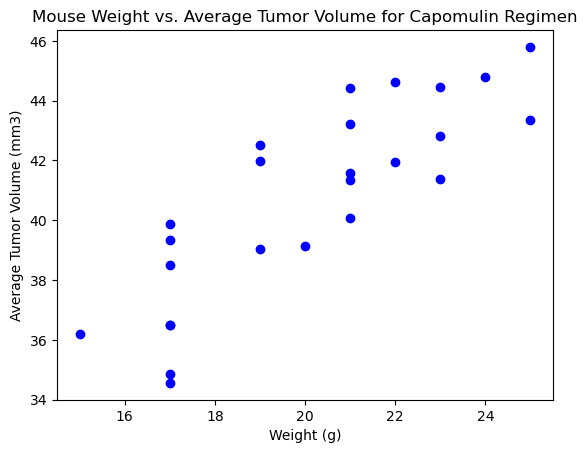

In [171]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_data = cleaned_data.loc[cleaned_data["Drug Regimen"] == "Capomulin"]

# Calculate the average tumor volume per mouse
average_tumor_volume = capomulin_data.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()

# Get the weight of each mouse in the Capomulin regimen
mouse_weight = capomulin_data.groupby("Mouse ID")["Weight (g)"].first()

# Generate the scatter plot
plt.scatter(mouse_weight, average_tumor_volume, color='b')
plt.title("Mouse Weight vs. Average Tumor Volume for Capomulin Regimen")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

In [175]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
from scipy.stats import linregress

# Calculate the average tumor volume per mouse
average_tumor_volume = capomulin_data.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()

# Get the weight of each mouse in the Capomulin regimen
mouse_weight = capomulin_data.groupby("Mouse ID")["Weight (g)"].first()

# Calculate the correlation coefficient
correlation = mouse_weight.corr(average_tumor_volume)

print(f"The correlation between mouse weight and the average tumor volumen is: {correlation}")


The correlation between mouse weight and the average tumor volumen is: 0.8419363424694722


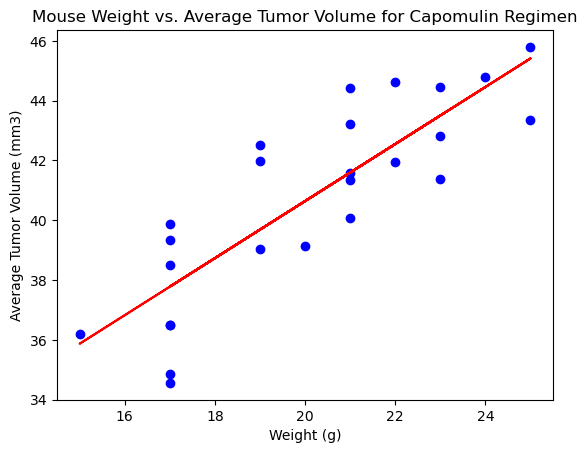

In [180]:
# Perform linear regression 
slope, intercept, r_value, p_value, std_err = linregress(mouse_weight, average_tumor_volume)

#Generate regression line values
regress_values = slope * mouse_weight + intercept

plt.scatter(mouse_weight, average_tumor_volume, color='b')
plt.plot(mouse_weight, regress_values, color='r', label="Regression Line")
plt.title("Mouse Weight vs. Average Tumor Volume for Capomulin Regimen")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()
